In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression

## fixing random for lesson generation
np.random.seed(321)

## Standard Statsmodels import
import statsmodels.api as sm



In [3]:
## load data
fpath="https://docs.google.com/spreadsheets/d/e/2PACX-1vRHn-VvsM6-rRjBdkV-AhjPmVai2CrlCxpEYe8Mmtk1wsS5sGEft-5nJTk0V99Tw-hDLLgARISU5-d_/pub?output=csv"
df = pd.read_csv(fpath)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [4]:
## checking for null values
df.isna().sum()



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

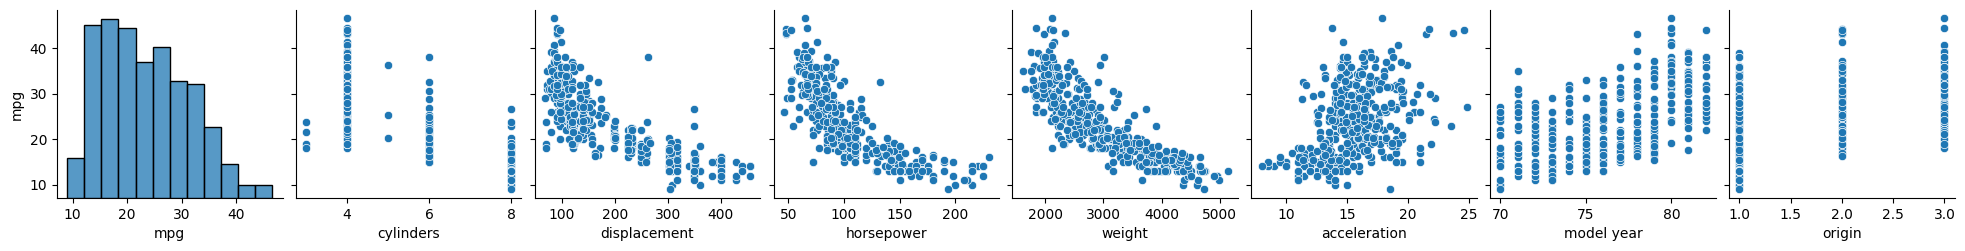

In [5]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='mpg');



In [6]:
## convert origin to names
origin_map = {1:'NA', 2:'EU', 3:'AS'}
df['origin'] = df['origin'].replace(origin_map)
df['origin'].value_counts()



NA    245
AS     79
EU     68
Name: origin, dtype: int64

In [7]:
## Make x and y variables
y = df['mpg'].copy()
X = df.drop(columns=['mpg','car name']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()



,cylinders,displacement,horsepower,weight,acceleration,model year,origin
295,5,183.0,77,3530,20.1,79,EU
214,4,98.0,68,2045,18.5,77,AS
48,4,122.0,86,2220,14.0,71,NA
302,4,91.0,69,2130,14.7,79,EU
160,6,258.0,110,3730,19.0,75,NA


In [8]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols



['origin']

In [9]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols



['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

In [10]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')



In [11]:
## fit the col transformer
preprocessor.fit(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['origin']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['cylinders', 'displacement', 'horsepower',
                                  'weight', 'acceleration', 'model year'])])

In [12]:
pd.DataFrame(preprocessor.transform(X_train).round(3))



,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,5.0,183.0,77.0,3530.0,20.1,79.0
1,1.0,0.0,0.0,4.0,98.0,68.0,2045.0,18.5,77.0
2,0.0,0.0,1.0,4.0,122.0,86.0,2220.0,14.0,71.0
3,0.0,1.0,0.0,4.0,91.0,69.0,2130.0,14.7,79.0
4,0.0,0.0,1.0,6.0,258.0,110.0,3730.0,19.0,75.0
...,...,...,...,...,...,...,...,...,...
289,0.0,0.0,1.0,6.0,258.0,95.0,3193.0,17.8,76.0
290,0.0,1.0,0.0,4.0,141.0,71.0,3190.0,24.8,79.0
291,0.0,0.0,1.0,8.0,350.0,155.0,4360.0,14.9,79.0
292,0.0,0.0,1.0,6.0,198.0,95.0,3102.0,16.5,74.0


In [13]:
## Create the empty list
final_features = []


In [14]:
## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [15]:
## A) Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps



{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [16]:
## A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
## B) Using list-slicing to find the encoder 
ohe_step = preprocessor.named_transformers_['pipeline-1'][-1]
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [18]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features



array(['origin_AS', 'origin_EU', 'origin_NA'], dtype=object)

In [19]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features



['origin_AS', 'origin_EU', 'origin_NA']

In [20]:
num_cols


['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

In [21]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features



['origin_AS',
 'origin_EU',
 'origin_NA',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

In [22]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()



,origin_AS,origin_EU,origin_NA,cylinders,displacement,horsepower,weight,acceleration,model year
295,0.0,1.0,0.0,5.0,183.0,77.0,3530.0,20.1,79.0
214,1.0,0.0,0.0,4.0,98.0,68.0,2045.0,18.5,77.0
48,0.0,0.0,1.0,4.0,122.0,86.0,2220.0,14.0,71.0
302,0.0,1.0,0.0,4.0,91.0,69.0,2130.0,14.7,79.0
160,0.0,0.0,1.0,6.0,258.0,110.0,3730.0,19.0,75.0


In [23]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()



,origin_AS,origin_EU,origin_NA,cylinders,displacement,horsepower,weight,acceleration,model year
58,0.0,1.0,0.0,4.0,97.0,54.0,2254.0,23.5,72.0
234,0.0,0.0,1.0,4.0,140.0,89.0,2755.0,15.8,77.0
300,0.0,0.0,1.0,4.0,105.0,70.0,2150.0,14.9,79.0
278,0.0,0.0,1.0,6.0,231.0,115.0,3245.0,15.4,79.0
321,0.0,0.0,1.0,4.0,156.0,105.0,2800.0,14.4,80.0


In [24]:
## Demo of adding a constant to X_train (not rewriting the df yet-confirming expected results first)
sm.add_constant(X_train_df, prepend=False, has_constant='add').head()



,origin_AS,origin_EU,origin_NA,cylinders,displacement,horsepower,weight,acceleration,model year,const
295,0.0,1.0,0.0,5.0,183.0,77.0,3530.0,20.1,79.0,1.0
214,1.0,0.0,0.0,4.0,98.0,68.0,2045.0,18.5,77.0,1.0
48,0.0,0.0,1.0,4.0,122.0,86.0,2220.0,14.0,71.0,1.0
302,0.0,1.0,0.0,4.0,91.0,69.0,2130.0,14.7,79.0,1.0
160,0.0,0.0,1.0,6.0,258.0,110.0,3730.0,19.0,75.0,1.0


In [25]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))



,origin_AS,origin_EU,origin_NA,cylinders,displacement,horsepower,weight,acceleration,model year,const
295,0.0,1.0,0.0,5.0,183.0,77.0,3530.0,20.1,79.0,1.0
214,1.0,0.0,0.0,4.0,98.0,68.0,2045.0,18.5,77.0,1.0


,origin_AS,origin_EU,origin_NA,cylinders,displacement,horsepower,weight,acceleration,model year,const
58,0.0,1.0,0.0,4.0,97.0,54.0,2254.0,23.5,72.0,1.0
234,0.0,0.0,1.0,4.0,140.0,89.0,2755.0,15.8,77.0,1.0


### Model

In [26]:
#reviewing sklearn
model = LinearRegression(fit_intercept=False)


In [27]:
# fit the model 
model.fit(X_train_df, y_train)


LinearRegression(fit_intercept=False)

In [28]:
# Define predictions
train_preds = model.predict(X_train_df)
test_preds = model.predict(X_test_df)


In [29]:
from sklearn.metrics import r2_score, mean_squared_error
# find r-square
print('Training r2:', r2_score(y_train, train_preds))
print('Testing r2:', r2_score(y_test, test_preds))
# find mse
print('Training MSE:', mean_squared_error(y_train, train_preds))
print('Testing MSE:', mean_squared_error(y_test, test_preds))



Training r2: 0.8286810857378513
Testing r2: 0.8004114047965177
Training MSE: 10.753429890369437
Testing MSE: 10.896397830942806


##### Fitting an OLS in statsmodels

In [30]:
import statsmodels.api as sm


In [31]:
## instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)



In [32]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()


In [33]:
## get model performance metrics
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.89e-104
Time:                        08:04:54   Log-Likelihood:                -766.33
No. Observations:                 294   AIC:                             1551.
Df Residuals:                     285   BIC:                             1584.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
origin_AS       -3.1274      1.400     -2.234      0.026      -5.882      -0.372
origin_EU       -2.9499      1.355     -2.176      0.030      -5.618      -0.282
origin_NA       -6.4226      1.395     -4.606      0.000      -9.168      -3.678
cylinders       -0.4756      0.374     -1.273      0.204      -1.211       0.260
displacement     0.0260      0.009      2.931      0.004       0.009       0.044
horsepower      -0.0291      0.017     -1.760      0.080      -0.062       0.003
weight          -0.0064      0.001     -8.657      0.000      -0.008      -0.005
acceleration     0.0898      0.113      0.793      0.428      -0.133       0.313
model year       0.7814      0.060     13.085      0.000       0.664       0.899
const          -12.4999      3.986     -3.136      0.002     -20.346      -4.654
==============================================================================
Omnibus:                       16.586   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.615
Skew:                           0.409   Prob(JB):                     7.45e-06
Kurtosis:                       4.121   Cond. No.                     5.72e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
# after fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)


In [36]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)




In [38]:
print(f'Our testing r-squared value is only displaying 2 decimal points and is {test_r2:.2f}.')


Our testing r-squared value is only displaying 2 decimal points and is 0.80.
